# Seaborn - 고급 그래프
: Matplotlib의 기능과 스타일을 확장한 파이썬 시각 도구의 고급 버전

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Seaborn Packages에서 제공하는 titanic 데이터를 불러옴
import seaborn as sns

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 회귀선이 있는 산점도

In [4]:
import matplotlib.pyplot as plt

In [16]:
sns.set_style('whitegrid') # darkgrid, whitegrid, dark, white, ticks

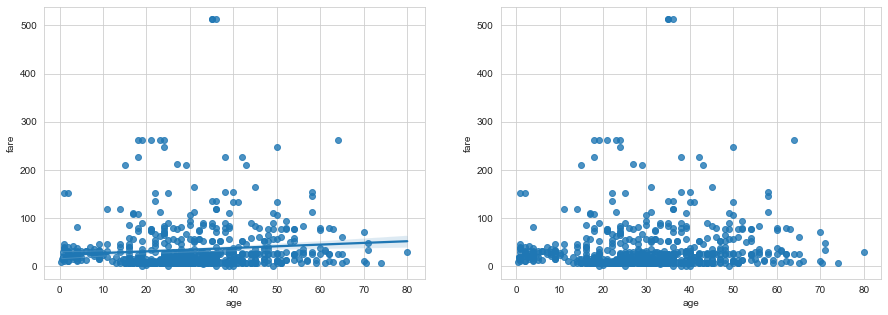

In [17]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 선형 회귀선이 포함된 그래프 그리기
sns.regplot(x='age', y='fare', data=titanic, ax=ax1)

# 선형 회귀선이 포함되지 않은 그래프 그리기
sns.regplot(x='age', y='fare', data=titanic, ax=ax2, fit_reg = False)

plt.show()

---
# 히스토그램 / 커널밀도그래프
: 커널밀도 함수는 그래프와 X축 사이의 면적이 1이 되도록 그리는 밀도 분포 함수

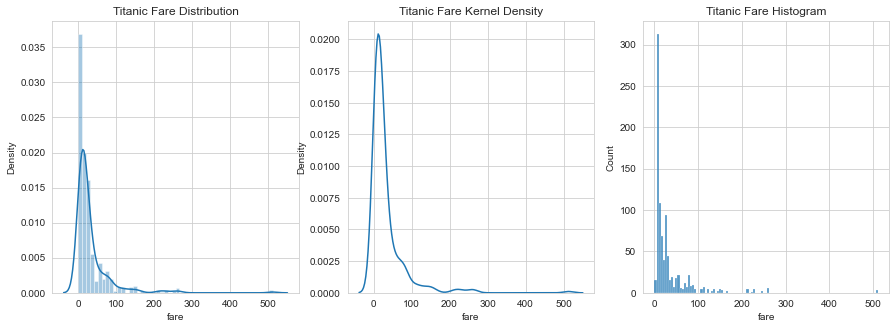

In [24]:
fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 히스토그램 / 커널 밀도
sns.distplot(titanic['fare'], ax=ax1)

# 커널 밀도
sns.kdeplot(titanic['fare'], ax=ax2)

# 히스토그램
sns.histplot(titanic['fare'], ax=ax3)

# 차트 제목
ax1.set_title('Titanic Fare Distribution')
ax2.set_title('Titanic Fare Kernel Density')
ax3.set_title('Titanic Fare Histogram')

plt.show()

> 운임(fare)이 대부분 100달러 미만에 집중 되어있다

---
### 히트맵(heatmap)
- 2개의 범주형 변수를 각각 x, y축에 놓고 데이터를 매트릭스 형태로 분류

In [25]:
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


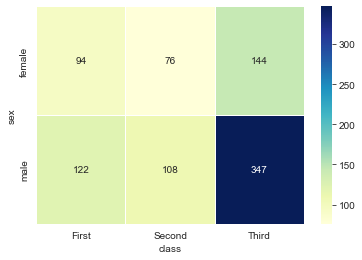

In [30]:
sns.heatmap(
  table,
  annot=True,
  fmt= 'd', # 지수가 아닌 정수
  linewidths= 0.5,
  cmap='YlGnBu', # 찾아보기
  # cbar = False > 오른쪽 바 숨길 수 있음
)

plt.show()

### 범주형 데이터의 산점도
- 범주형 변수에 들어있는 각 범주별 데이터의 분포를 확인

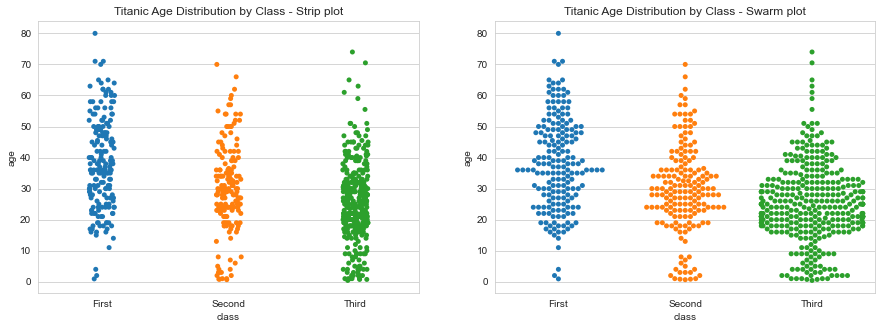

In [36]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

sns.stripplot(x='class', y='age', data=titanic, ax=ax1) # 몰려있는 정도를 정확히 알기 어려움
sns.swarmplot(x='class', y='age', data=titanic, ax=ax2) # 몰려있는 정도를 비교적 정확히 알 수 있음

# 차트 제목
ax1.set_title('Titanic Age Distribution by Class - Strip plot')
ax2.set_title('Titanic Age Distribution by Class - Swarm plot')

plt.show()

---
### 막대 그래프

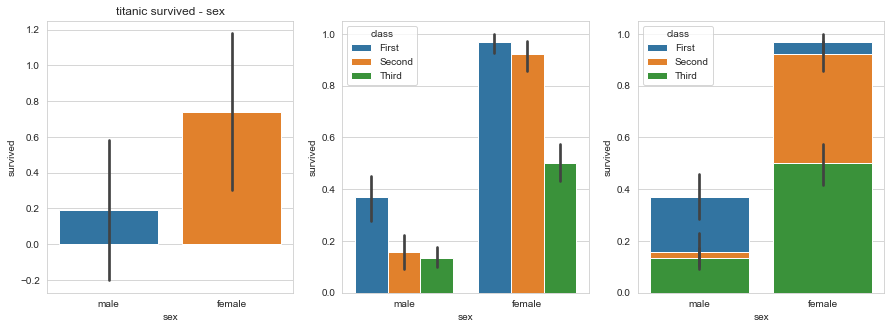

In [44]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

sns.barplot(x='sex', y='survived', data=titanic, ax=ax1, 
  ci = 'sd'
)
sns.barplot(
    x = 'sex',
    y = 'survived',
    hue = 'class',
    data = titanic,
    ax = ax2,
) 
sns.barplot(
    x = 'sex',
    y = 'survived',
    hue = 'class',
    data = titanic,
    ax = ax3,
    # 누적
    dodge=False
) 



# title
ax1.set_title('titanic survived - sex')


plt.show()

<AxesSubplot:xlabel='alive', ylabel='age'>

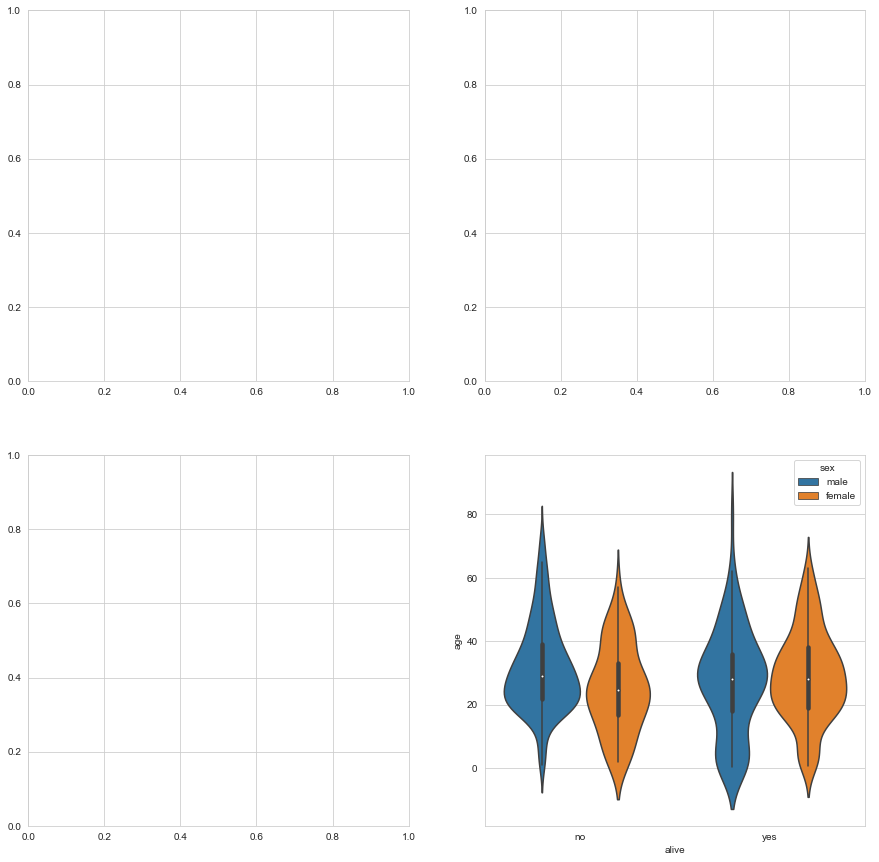

In [47]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

sns.violinplot(
  x = 'alive',
  y = 'age',
  hue = 'sex',
  data = titanic,
  ax= ax4
)


---
### 조인트 그래프
- 산점도를 기본으로 표시하고 각 축에 대한 히스토그램을 동시 제공

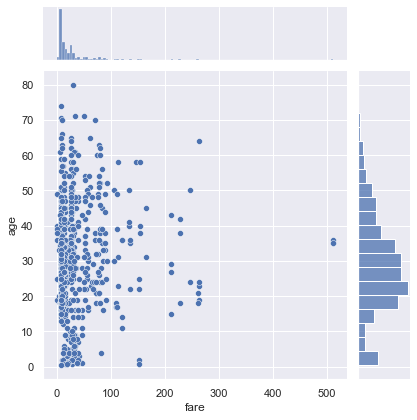

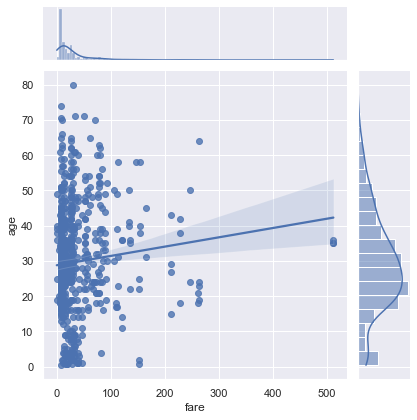

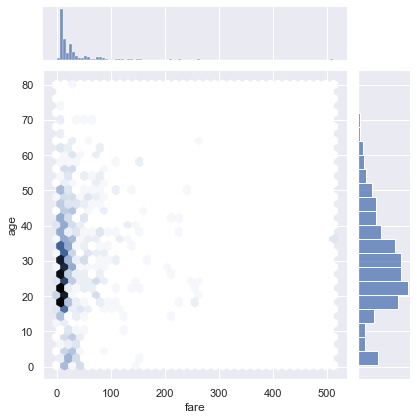

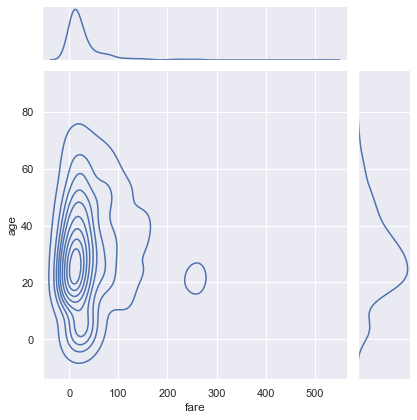

In [64]:
# 조인트 그래프: 산점도 (기본값)
j1 = sns.jointplot(
  x = 'fare', 
  y = 'age',
  data = titanic
)

# 조인트 그래프 : 회귀선
j2 = sns.jointplot(
  x = 'fare', 
  y = 'age',
  kind = 'reg',
  data = titanic
)

# 조인트 그래프 : 육각 그래프
j3 = sns.jointplot(
  x = 'fare',
  y = 'age',
  kind = 'hex',
  data = titanic
)

# 조인트 그래프 : 커널 밀집 그래프
j4 = sns.jointplot(
  x = 'fare',
  y = 'age',
  kind = 'kde',
  data = titanic
)

---
### 이변수 데이터 분포
- 매트릭스 형태로 짝을 지어 표현

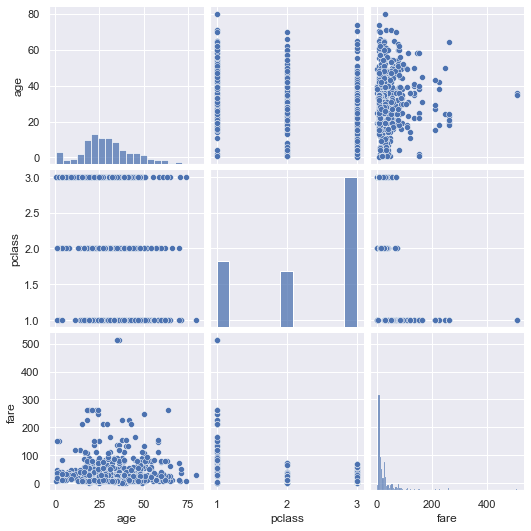

In [65]:
# titanic 데이터 셋 중에서 age, pclass, fare 선택하기
titanic_subset = titanic[['age', 'pclass', 'fare']]

# pairplot
sns.pairplot(titanic_subset)

plt.show()